In [5]:
import numpy as np
import dimod
import matplotlib.pyplot as plt
import dwave_networkx as dnx
import networkx as nx
import minorminer
import minorminer.layout as mml
%matplotlib inline
import dwave.inspector
import matplotlib as mpl
import math
from datetime import datetime
from pathlib import Path  
import pandas as pd
import os
import pickle
import random
from scipy.signal import savgol_filter
from scipy import interpolate
import h5py
from scipy.interpolate import griddata
import tarfile
plt.ioff()


In [13]:
statement = True
if statement:
    tar = tarfile.open("./data/data_for_paper_v2.tar")
    tar.extractall()
    tar.close()

In [40]:
# dat_file = "./data/magnetization_curves_L9_T0.1.dat"   
# dat_file = "./data_for_paper/Sqpath_L24_hz2.0_T0.1_selected_hx.tar"   
dat_file = "./data_for_paper/Sqpath_L24_hz2.0_classMC_tempscan.tar"   
tar = tarfile.open(dat_file)
tar.extractall("./data_for_paper/")
tar.close()

# with open(dat_file, 'r') as file:
#     text = file.read()
#     #print(text)

In [43]:
files = ['Sqpath_L24_temp0.1000_hx0.1000_hz2.0000_rank00003.dat', 'Sqpath_L24_temp0.1000_hx0.4000_hz2.0000_rank00011.dat', 'Sqpath_L24_temp0.1000_hx0.5000_hz2.0000_rank00014.dat',
'Sqpath_L24_temp0.1000_hx0.7500_hz2.0000_rank00022.dat', 'Sqpath_L24_temp0.1000_hx1.0000_hz2.0000_rank00025.dat', 'Sqpath_L24_temp0.1000_hx1.5000_hz2.0000_rank00030.dat',
'Sqpath_L24_temp0.1000_hx2.0000_hz2.0000_rank00035.dat']
gammvals = [0.1, 0.4, 0.5, 0.75, 1.0, 1.5, 2.0]

files_temp = ['Sqpath_L12_temp0.2000_rank00000.dat', 'Sqpath_L12_temp0.4000_rank00000.dat', 'Sqpath_L12_temp0.6000_rank00000.dat', 'Sqpath_L12_temp0.8000_rank00000.dat', 'Sqpath_L12_temp1.0000_rank00000.dat',
'Sqpath_L12_temp2.0000_rank00000.dat', 'Sqpath_L12_temp3.0000_rank00000.dat', 'Sqpath_L12_temp6.0000_rank00000.dat']
temps = [0.2, 0.4, 0.6, 0.8, 1.0, 2.0, 3.0, 6.0]

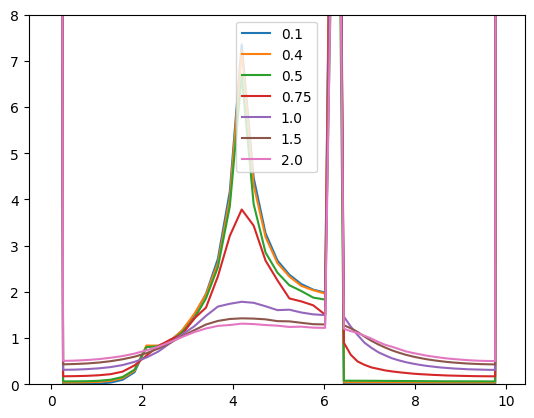

In [30]:
for j in range(len(gammvals)):
    dat_file = "./data_for_paper/" + files[j]   
    with open(dat_file, 'r') as file:
        text = file.read()
        # print(text)

    ary = text.split('\n')
    measurements = ary[7:-1]
    kpts = []
    sq_vals = []
    for k in range(len(measurements)):
        split_arr = measurements[k].split(' ')
        filtered = [float(elem) for elem in split_arr  if elem != '']
        # print(filtered)
        kpts.append(filtered[0]/2)
        sq_vals.append(filtered[3])

    plt.plot(kpts, sq_vals, label = gammvals[j])
plt.legend()
plt.ylim([0,8])
plt.show()

Plot for different gamma/J

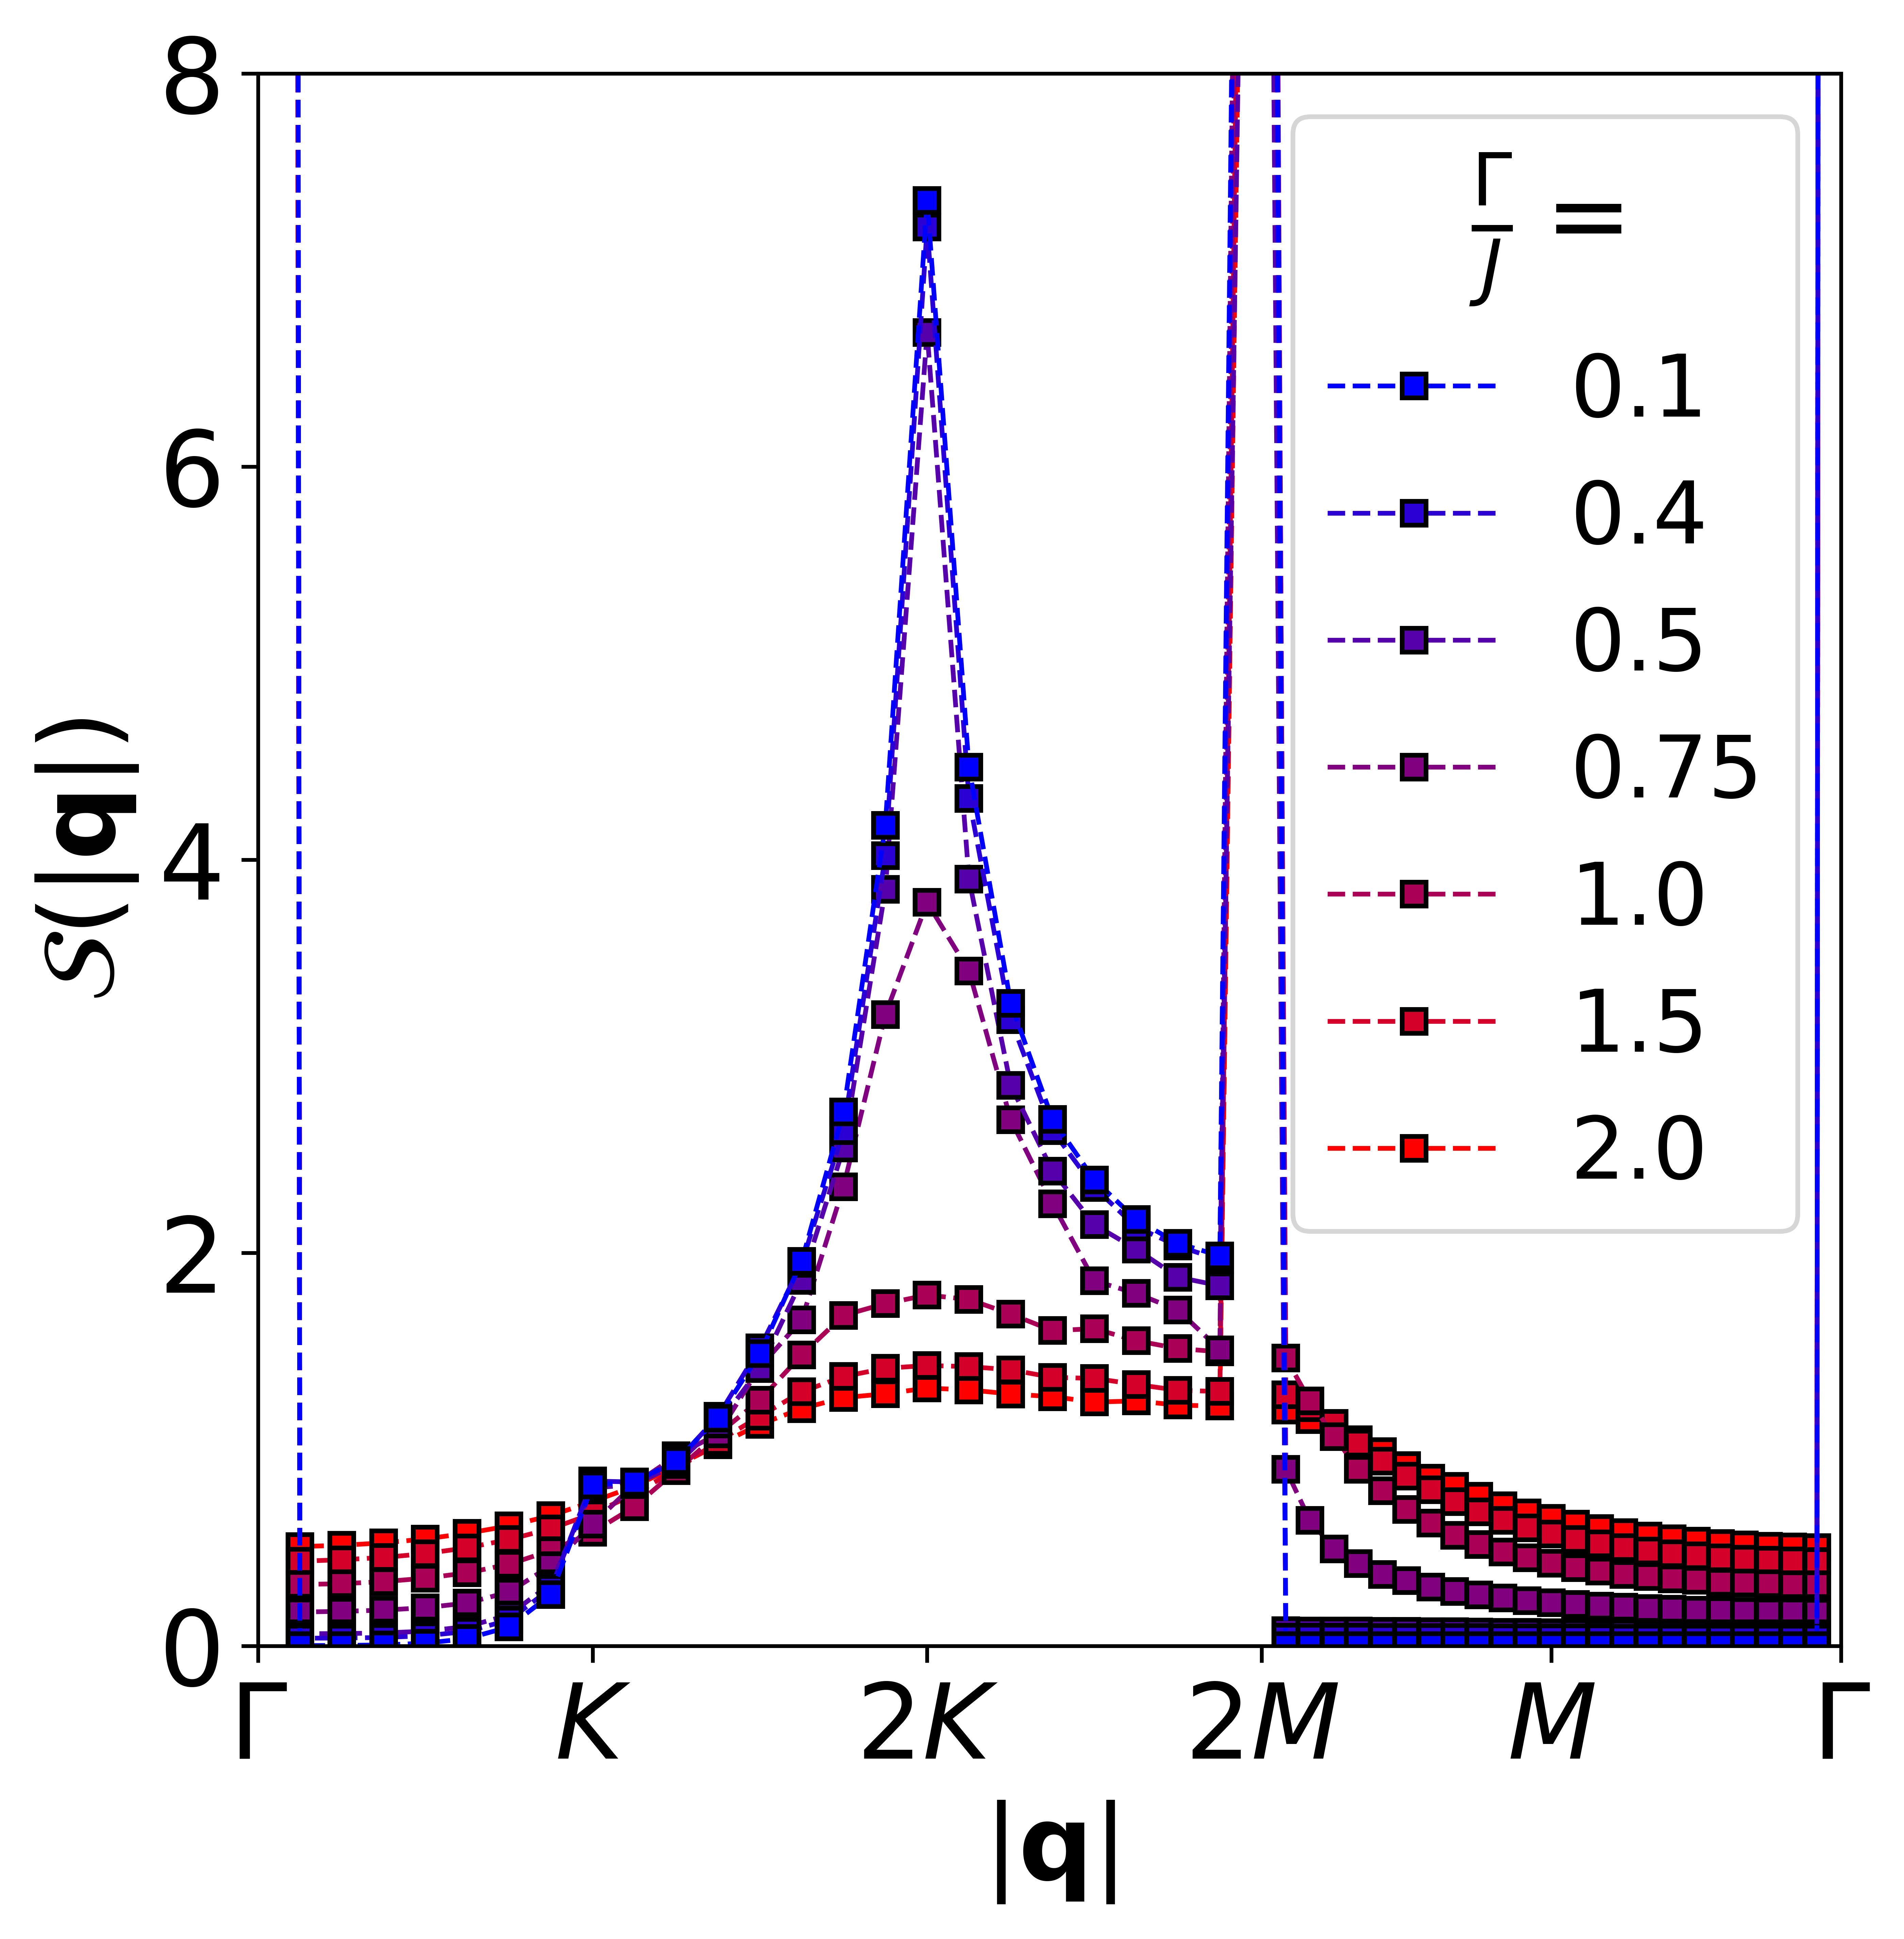

In [39]:
#some h, s=0.7

plt.rcParams['figure.dpi'] = 1000
plt.rcParams.update({'font.size':22})
plt.figure(figsize=(6,6))

K = (4*np.pi/3)*np.array([1, 0])
M = (4*np.pi/3)*(np.array([1, 0]) + np.array([np.cos(2*np.pi/6), np.sin(2*np.pi/6)]))/2
xpt_K = (4*np.pi/3) /2
xpt_2K = (4*np.pi/3) 
xpt_2M = (4*np.pi/3) + (4*np.pi/3) /2
xpt_M = (4*np.pi/3) + (4*np.pi/3) /2 + np.linalg.norm(M)/2
xpt_end = (4*np.pi/3) + (4*np.pi/3) /2 + np.linalg.norm(M)


tuples_s = list(zip([0.,1.0], ["blue","red"]))
cmap_s = mpl.colors.LinearSegmentedColormap.from_list("", tuples_s)


for j in range(len(gammvals)):
    dat_file = "./data_for_paper/" + files[j]   
    with open(dat_file, 'r') as file:
        text = file.read()
        # print(text)

    ary = text.split('\n')
    measurements = ary[7:-1]
    kpts = []
    sq_vals = []
    for k in range(len(measurements)):
        split_arr = measurements[k].split(' ')
        filtered = [float(elem) for elem in split_arr  if elem != '']
        # print(filtered)
        kpts.append(filtered[0]/2)
        sq_vals.append(filtered[3])

    plt.plot(kpts, sq_vals, marker = 's', ms = 5, markeredgecolor = 'black', linestyle = '--', color = cmap_s(j/(len(gammvals) - 1)), label =  '{}'.format(gammvals[j]), lw = 1, zorder = -j)
        
#numKpoints = len(finalSQ_spin_line)
# xticks = np.array([0, numKpoints/2, numKpoints, 2*numKpoints + 1, 2*numKpoints + 1 + (numKpoints + 1)/2, 3*numKpoints + 2])
xticks = np.array([0, xpt_K, xpt_2K, xpt_2M, xpt_M, xpt_end])
xticks_label = [r"$\Gamma$", r"$K$", r"$2K$", r"$2M$", r"$M$", r"$\Gamma$"]
# plt.ylim([0,(1/3)**2])
plt.xticks(ticks = xticks, labels = xticks_label);

# fakexy = (0, 0)
# a = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', color="Black", alpha=1.00)
# b = plt.Line2D(fakexy, fakexy, linestyle='none', marker='+', color="Black", alpha=1.00)
# plt.legend([a, b], [r"$s_p = 0.65$", r"$s_p = 0.15$"], loc='upper center', fontsize='small')

# plt.yscale('log')
plt.ylabel(r'$\mathcal{S}(|\mathbf{q}|)$')
plt.xlabel(r'$|\mathbf{q}|$')
plt.xlim([0,xpt_end])
plt.ylim([0, 8])
# plt.legend(bbox_to_anchor = [1.05, -0.16], ncols = 3)
plt.legend(loc = 'upper right', ncols = 1, title = r'$\frac{\Gamma}{J}=$', fontsize = 'small')
# plt.legend(loc = 'upper center', ncols = 2, fontsize = 'x-small')


# plt.savefig(where_to_save + "compare_APQ: " + tag2[2:] + ".png")
# plt.grid()
plt.show()

different temperatures

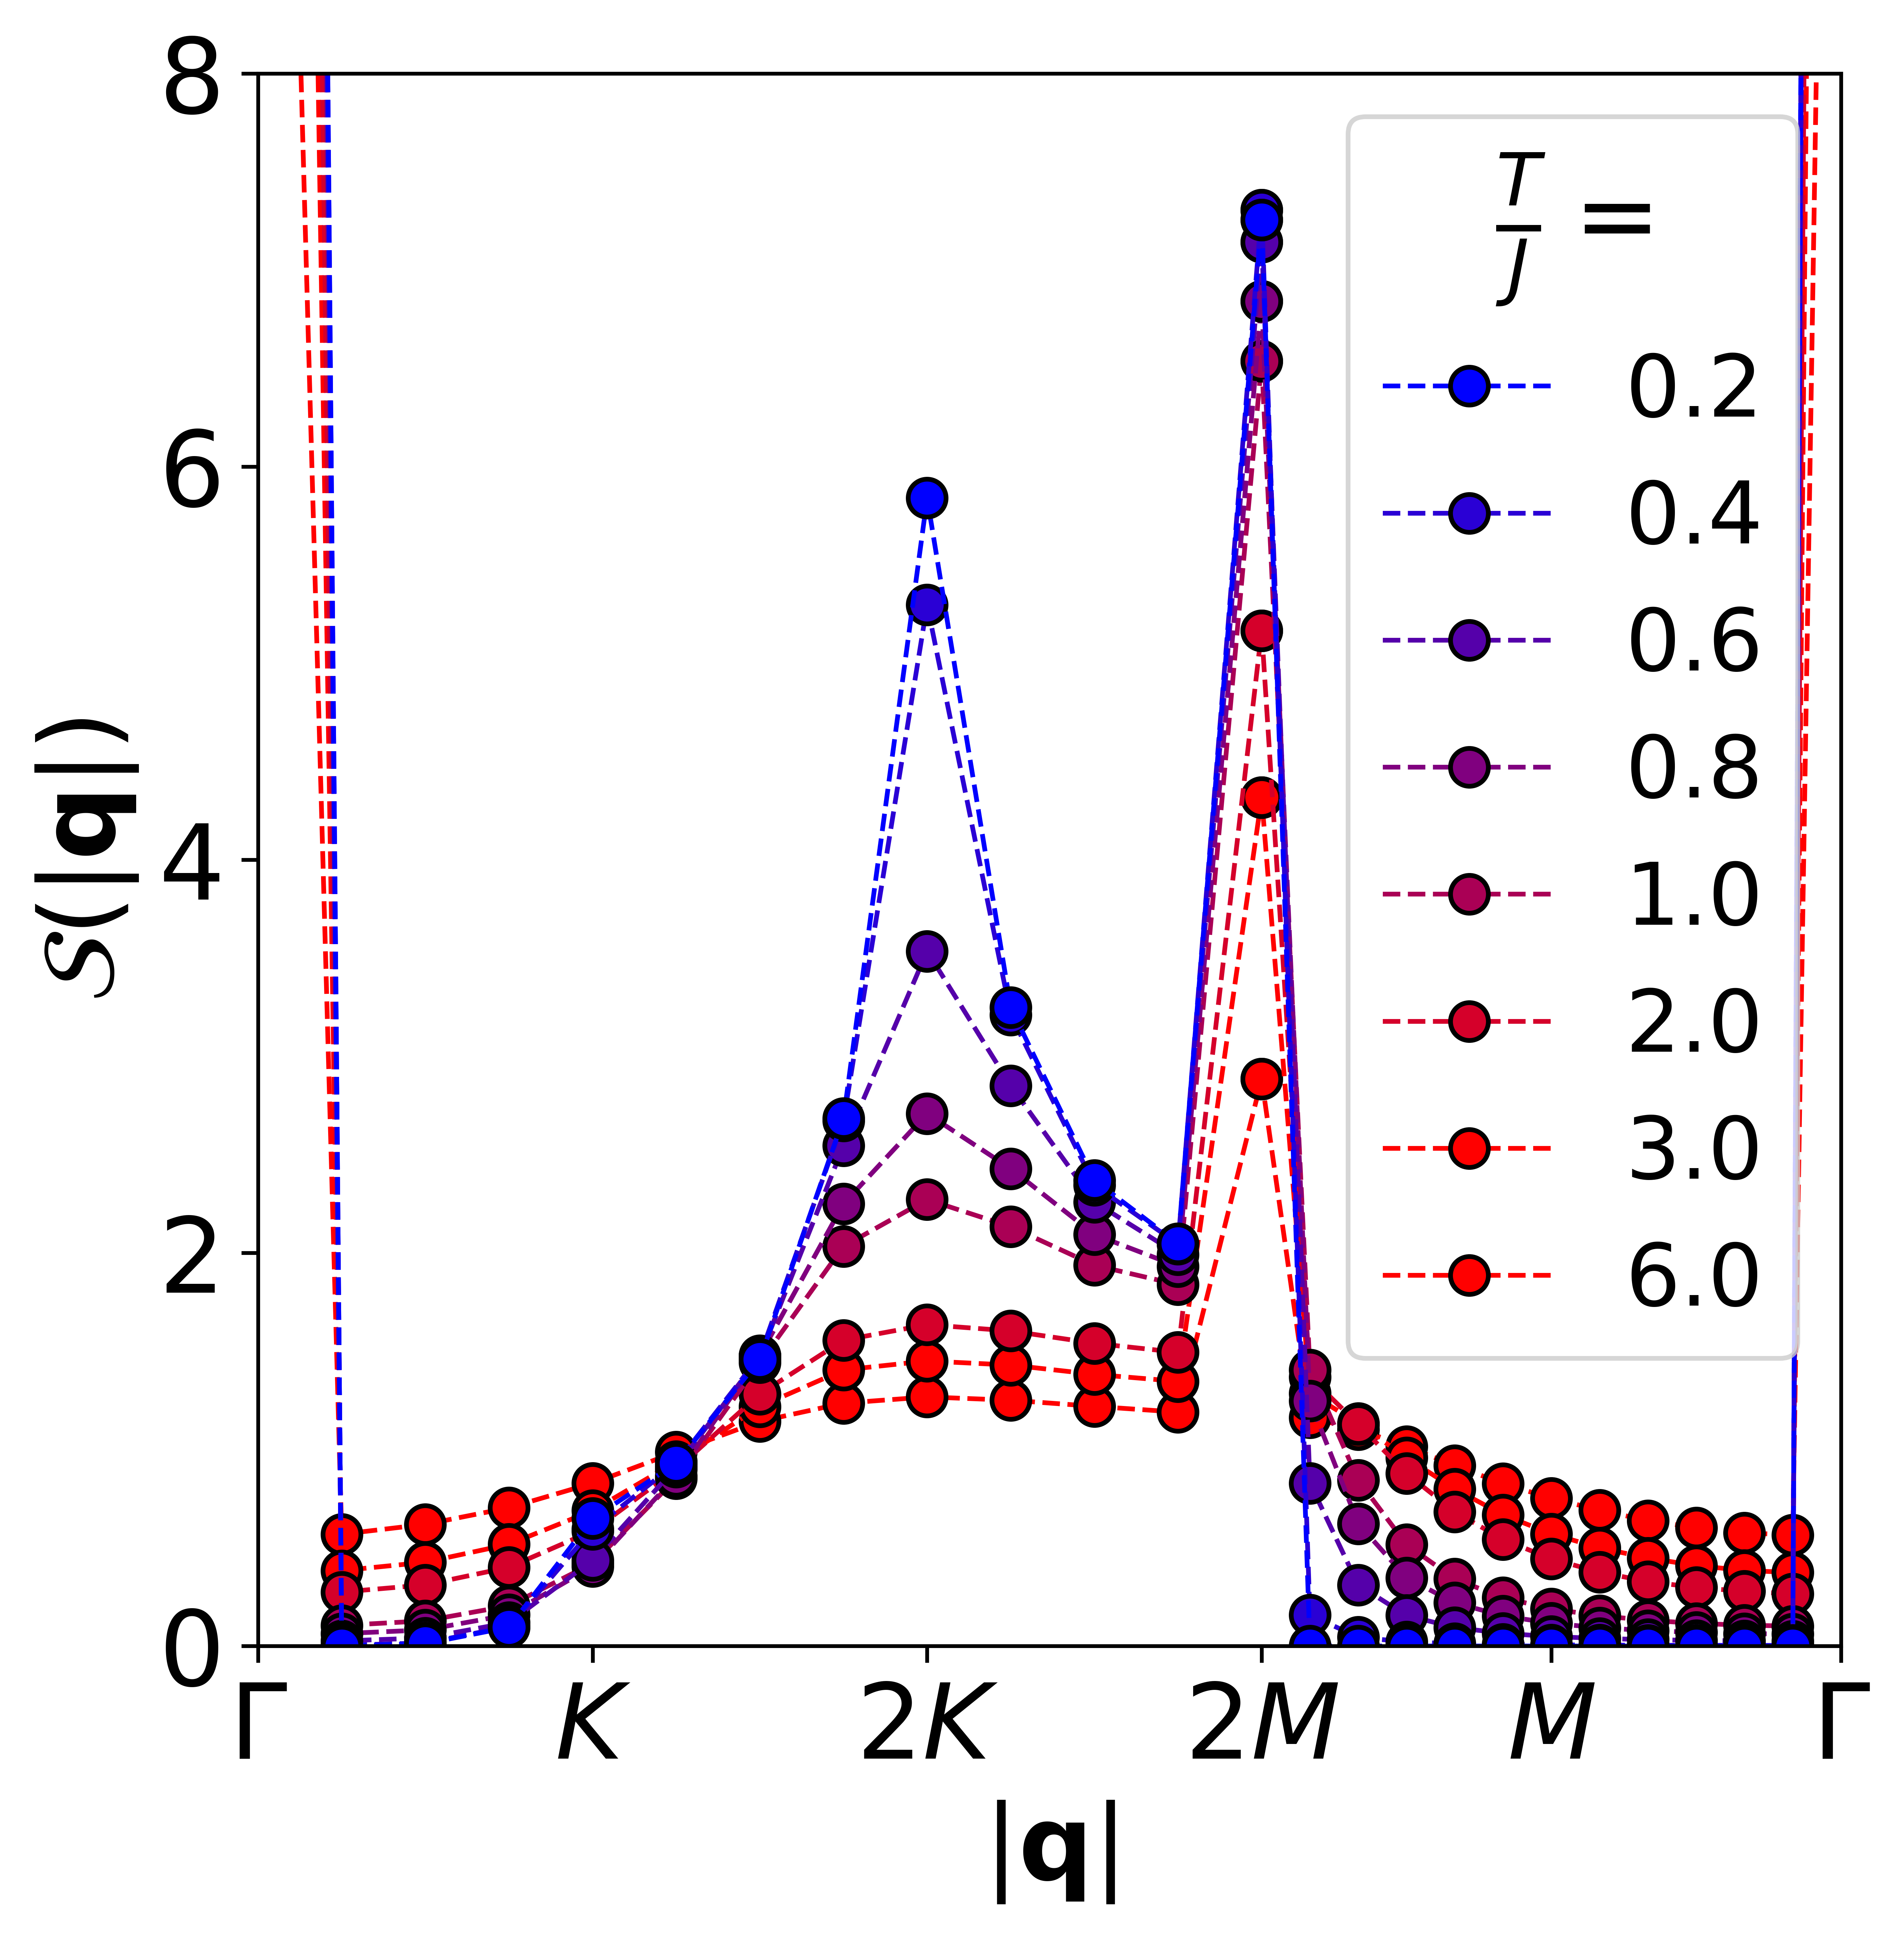

In [46]:
#some h, s=0.7

plt.rcParams['figure.dpi'] = 1000
plt.rcParams.update({'font.size':22})
plt.figure(figsize=(6,6))

K = (4*np.pi/3)*np.array([1, 0])
M = (4*np.pi/3)*(np.array([1, 0]) + np.array([np.cos(2*np.pi/6), np.sin(2*np.pi/6)]))/2
xpt_K = (4*np.pi/3) /2
xpt_2K = (4*np.pi/3) 
xpt_2M = (4*np.pi/3) + (4*np.pi/3) /2
xpt_M = (4*np.pi/3) + (4*np.pi/3) /2 + np.linalg.norm(M)/2
xpt_end = (4*np.pi/3) + (4*np.pi/3) /2 + np.linalg.norm(M)


tuples_s = list(zip([0.,1.0], ["blue","red"]))
cmap_s = mpl.colors.LinearSegmentedColormap.from_list("", tuples_s)


for j in range(len(temps)):
    dat_file = "./data_for_paper/" + files_temp[j]   
    with open(dat_file, 'r') as file:
        text = file.read()
        # print(text)

    ary = text.split('\n')
    measurements = ary[7:-1]
    kpts = []
    sq_vals = []
    for k in range(len(measurements)):
        split_arr = measurements[k].split(' ')
        filtered = [float(elem) for elem in split_arr  if elem != '']
        # print(filtered)
        kpts.append(filtered[0]/2)
        sq_vals.append(filtered[3])

    plt.plot(kpts, sq_vals, marker = 'o', ms = 8, markeredgecolor = 'black', linestyle = '--', color = cmap_s(j/(len(gammvals) - 1)), label =  '{}'.format(temps[j]), lw = 1, zorder = -j)
        
#numKpoints = len(finalSQ_spin_line)
# xticks = np.array([0, numKpoints/2, numKpoints, 2*numKpoints + 1, 2*numKpoints + 1 + (numKpoints + 1)/2, 3*numKpoints + 2])
xticks = np.array([0, xpt_K, xpt_2K, xpt_2M, xpt_M, xpt_end])
xticks_label = [r"$\Gamma$", r"$K$", r"$2K$", r"$2M$", r"$M$", r"$\Gamma$"]
# plt.ylim([0,(1/3)**2])
plt.xticks(ticks = xticks, labels = xticks_label);

# fakexy = (0, 0)
# a = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', color="Black", alpha=1.00)
# b = plt.Line2D(fakexy, fakexy, linestyle='none', marker='+', color="Black", alpha=1.00)
# plt.legend([a, b], [r"$s_p = 0.65$", r"$s_p = 0.15$"], loc='upper center', fontsize='small')

# plt.yscale('log')
plt.ylabel(r'$\mathcal{S}(|\mathbf{q}|)$')
plt.xlabel(r'$|\mathbf{q}|$')
plt.xlim([0,xpt_end])
plt.ylim([0, 8])
# plt.legend(bbox_to_anchor = [1.05, -0.16], ncols = 3)
plt.legend(loc = 'upper right', ncols = 1, title = r'$\frac{T}{J}=$', fontsize = 'small')
# plt.legend(loc = 'upper center', ncols = 2, fontsize = 'x-small')


# plt.savefig(where_to_save + "compare_APQ: " + tag2[2:] + ".png")
# plt.grid()
plt.show()

different h/J for a given s_p

plot which s_p ? ['s=0.65']
plot which h/J ? ['0' '1' '2' '3' '4']


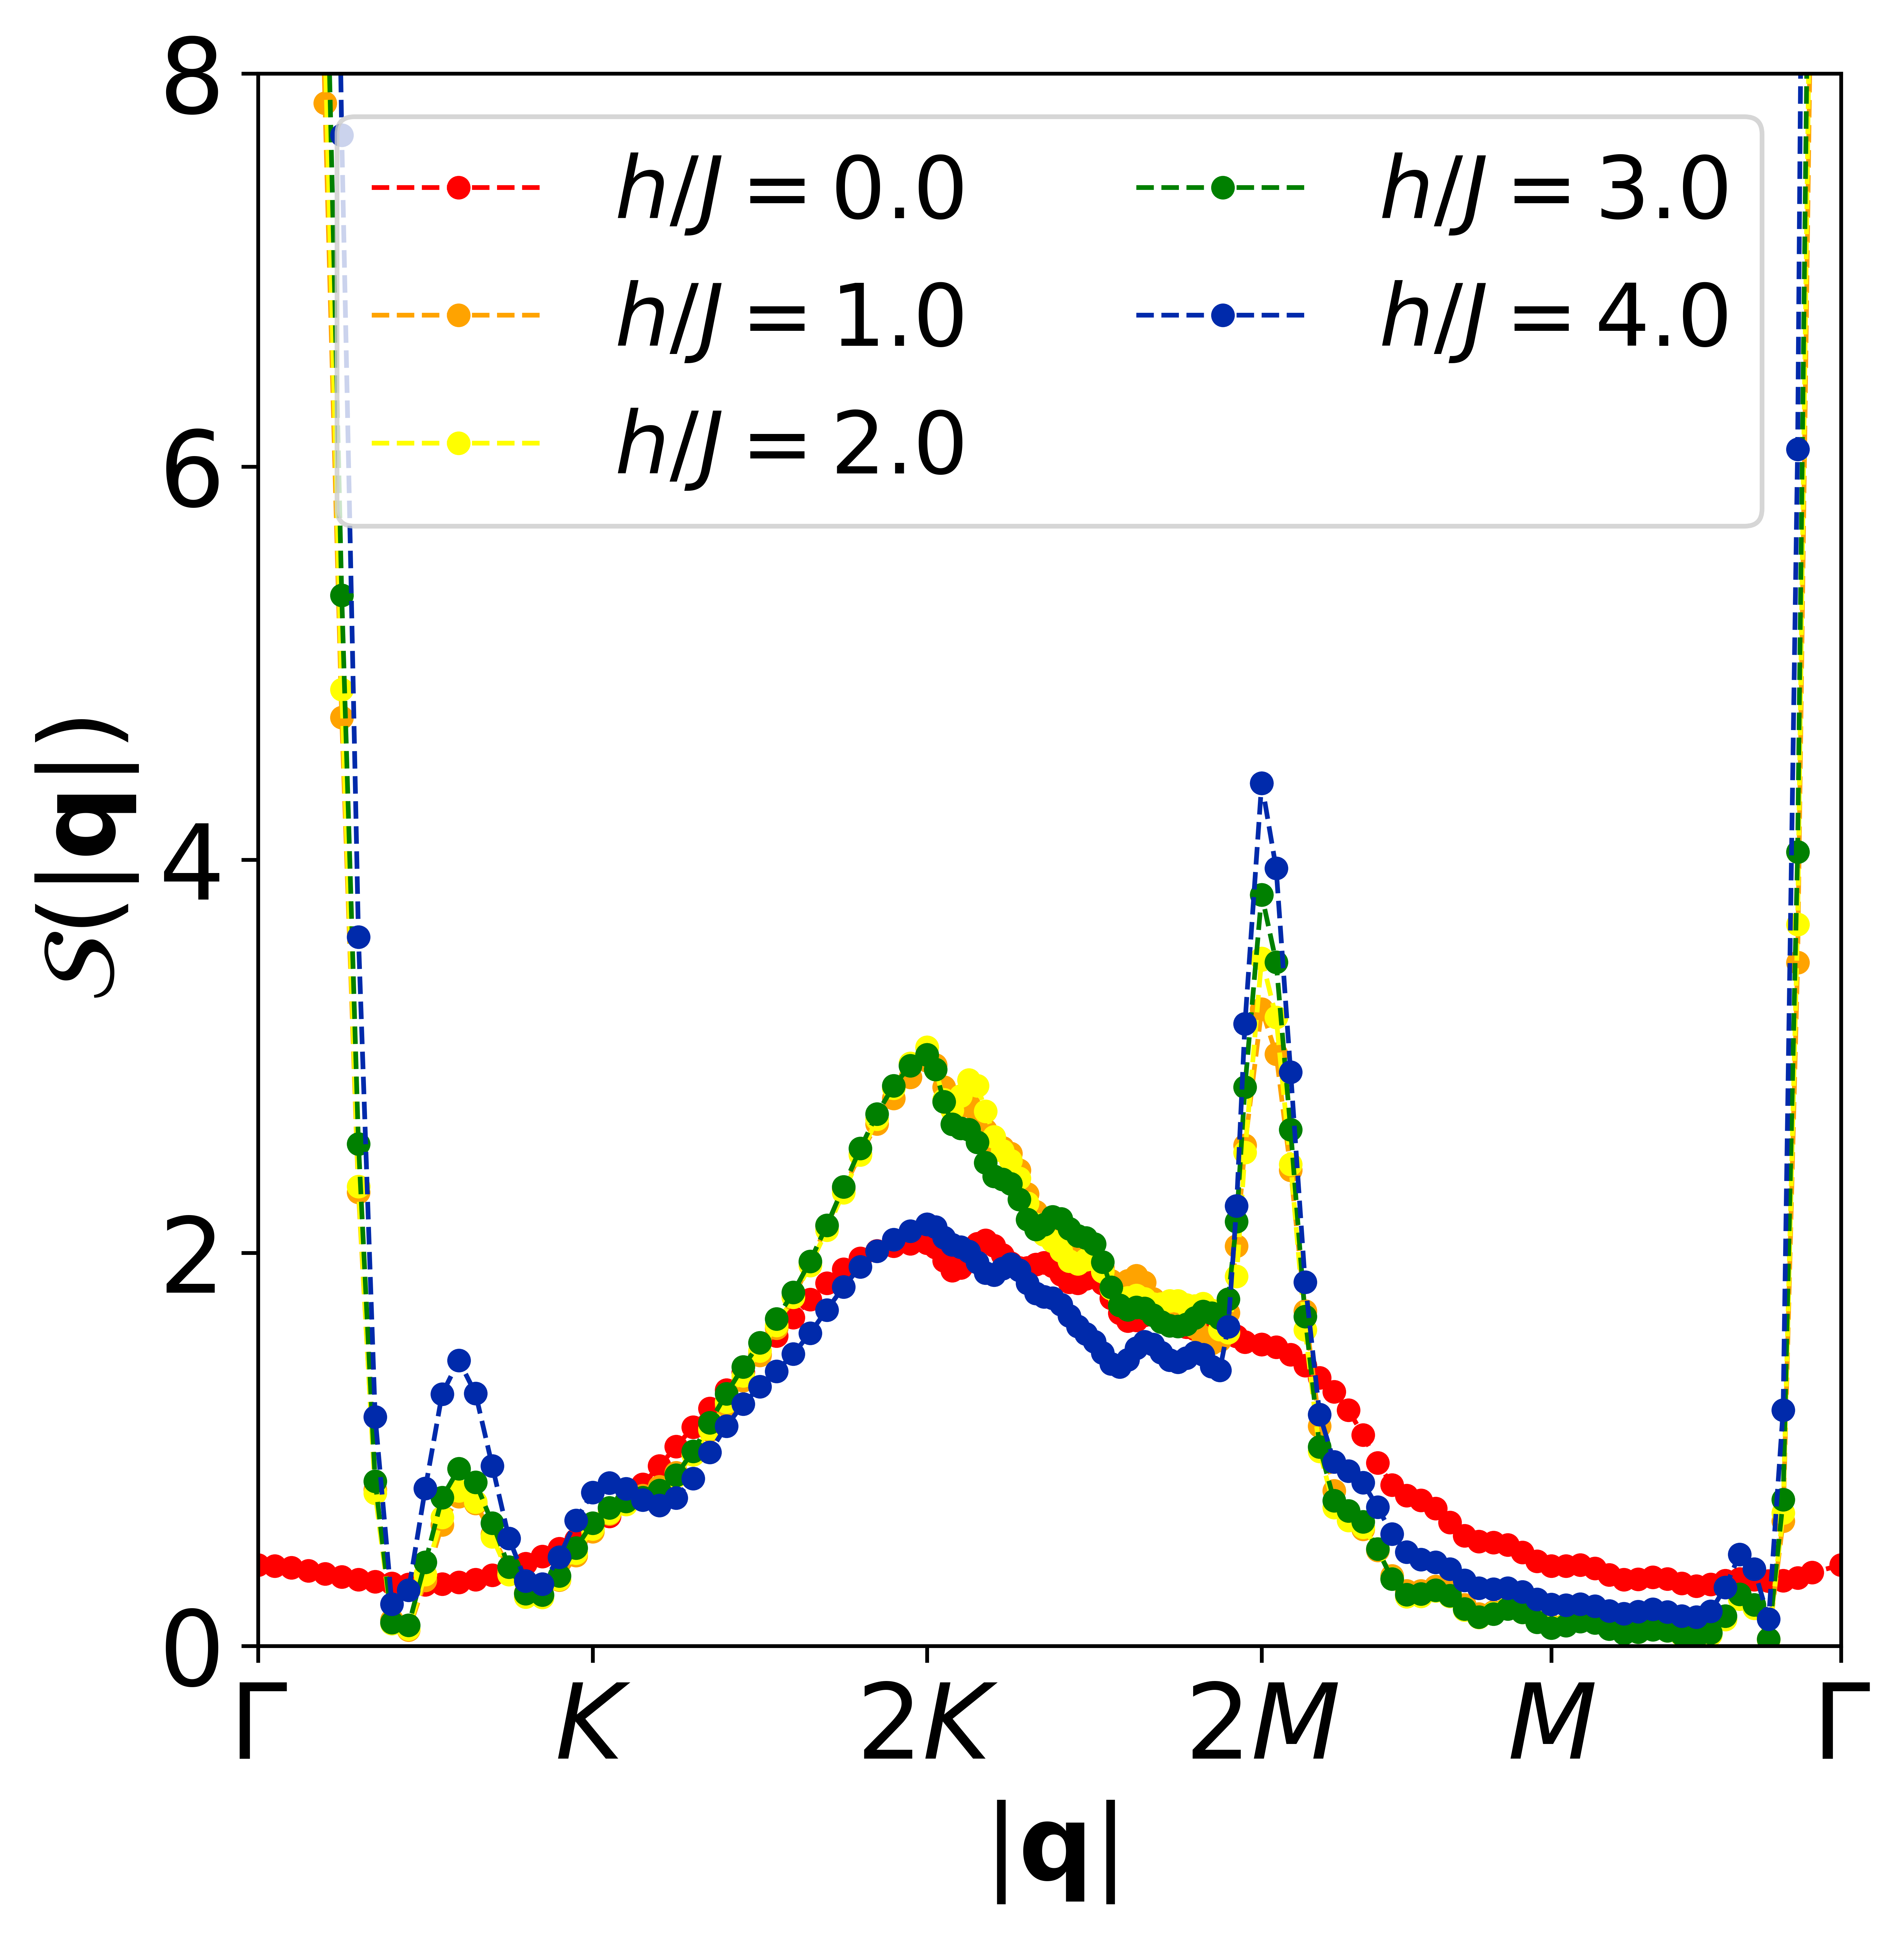

In [78]:
#some h, s=0.7

plt.rcParams['figure.dpi'] = 1000
plt.rcParams.update({'font.size':22})
plt.figure(figsize=(6,6))

cvals  = [0.,1.0,2.0,3.0,4.5]
colors = ["red","orange","yellow","green","blue"]
norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
cmap = mpl.colors.LinearSegmentedColormap.from_list("", tuples)

which_s = [-1]
print('plot which s_p ?', np.array(slist)[which_s])
which_hJ = [i for i in range(len(hoverJ_apq))]
print('plot which h/J ?', np.array(hoverJ_apq)[which_hJ])
tag2 = slist[which_s[0]]

#compute all |q| values
all_x_vals = []
tag2 = slist[0]
file_name = where_to_save + "line_FT_h=" + tag1 + "_" + tag2 + ".hdf5"
data2 = h5py.File(file_name, 'r')
total_K = np.array(data2['total_K'])
k_distances = [0]
tally = 0
for i in range(1,len(total_K)):
    tally += np.linalg.norm(total_K[i] - total_K[i - 1])
    k_distances.append(tally)

K = (4*np.pi/3)*np.array([1, 0])
M = (4*np.pi/3)*(np.array([1, 0]) + np.array([np.cos(2*np.pi/6), np.sin(2*np.pi/6)]))/2
xpt_K = (4*np.pi/3) /2
xpt_2K = (4*np.pi/3) 
xpt_2M = (4*np.pi/3) + (4*np.pi/3) /2
xpt_M = (4*np.pi/3) + (4*np.pi/3) /2 + np.linalg.norm(M)/2
xpt_end = (4*np.pi/3) + (4*np.pi/3) /2 + np.linalg.norm(M)

step = 1
numKpoints = 40
# orders = [0, numKpoints, 2*numKpoints + 1, 3*numKpoints + 2]
orders = []
orders.extend([step*i for i in range(numKpoints//step)])
orders.extend([numKpoints])
orders.extend([numKpoints + step*i for i in range(numKpoints//step)])
orders.extend([2*numKpoints + 1])
orders.extend([2*numKpoints + 1 + step*i for i in range(numKpoints//step)])
orders.extend([3*numKpoints + 2])


tuples_s = list(zip([0.,1.0], ["red","blue"]))
cmap_s = mpl.colors.LinearSegmentedColormap.from_list("", tuples_s)


markers = ['o', '+', 's']

for j in which_hJ:
    tag1 = hoverJ_apq[which_hJ[j]]
    file_name = where_to_save + "line_FT_h=" + tag1 + "_" + tag2 + ".hdf5"
    data2 = h5py.File(file_name, 'r')
    finalSQ_spin_line = np.real(data2['avg_sigmasigma'])

    #this is to smoothen the curve
    yhat = savgol_filter(finalSQ_spin_line, 10, 1)

    # f = interpolate.interp1d(x, y)

    #plt.plot(finalSQ_spin, marker = 'o', c = cmap(), label = 'Data')
    # orders = np.arange(0, len(finalSQ_spin_line), step)
    # plt.plot(yhat[orders], marker = 's', linestyle = '-', label = 'h/J=' + tag1, color = cmap(float(tag1)/4.5))
    # yvals = finalSQ_spin_line[orders]
    yvals = 168*finalSQ_spin_line[orders]
    # yvals = 3*168*yhat[orders]
    xvals = np.array(k_distances)[orders]

    # plt.plot(orders, yvals, marker = '+', linestyle = '--', color = cmap(float(tag1)/4.5))
    plt.plot(xvals, yvals, marker = 'o', ms = 5, markeredgecolor = 'none', linestyle = '--', color = cmap(float(tag1)/4.5), label = r'$h/J=$' + '{:.1f}'.format(float(tag1)), lw = 1)

        
#numKpoints = len(finalSQ_spin_line)
# xticks = np.array([0, numKpoints/2, numKpoints, 2*numKpoints + 1, 2*numKpoints + 1 + (numKpoints + 1)/2, 3*numKpoints + 2])
xticks = np.array([0, xpt_K, xpt_2K, xpt_2M, xpt_M, xpt_end])
xticks_label = [r"$\Gamma$", r"$K$", r"$2K$", r"$2M$", r"$M$", r"$\Gamma$"]
# plt.ylim([0,(1/3)**2])
plt.xticks(ticks = xticks, labels = xticks_label);

# fakexy = (0, 0)
# a = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', color="Black", alpha=1.00)
# b = plt.Line2D(fakexy, fakexy, linestyle='none', marker='+', color="Black", alpha=1.00)
# plt.legend([a, b], [r"$s_p = 0.65$", r"$s_p = 0.15$"], loc='upper center', fontsize='small')

# plt.yscale('log')
plt.ylabel(r'$\mathcal{S}(|\mathbf{q}|)$')
plt.xlabel(r'$|\mathbf{q}|$')
plt.xlim([0,xpt_end])
plt.ylim([0, 8])
# plt.legend(bbox_to_anchor = [1.05, -0.16], ncols = 3)
plt.legend(loc = 'upper center', ncols = 2, fontsize = 'small')
# plt.legend(loc = 'upper center', ncols = 2)


# plt.savefig(where_to_save + "compare_APQ: " + tag2[2:] + ".png")
# plt.grid()
plt.show()

show where the points are

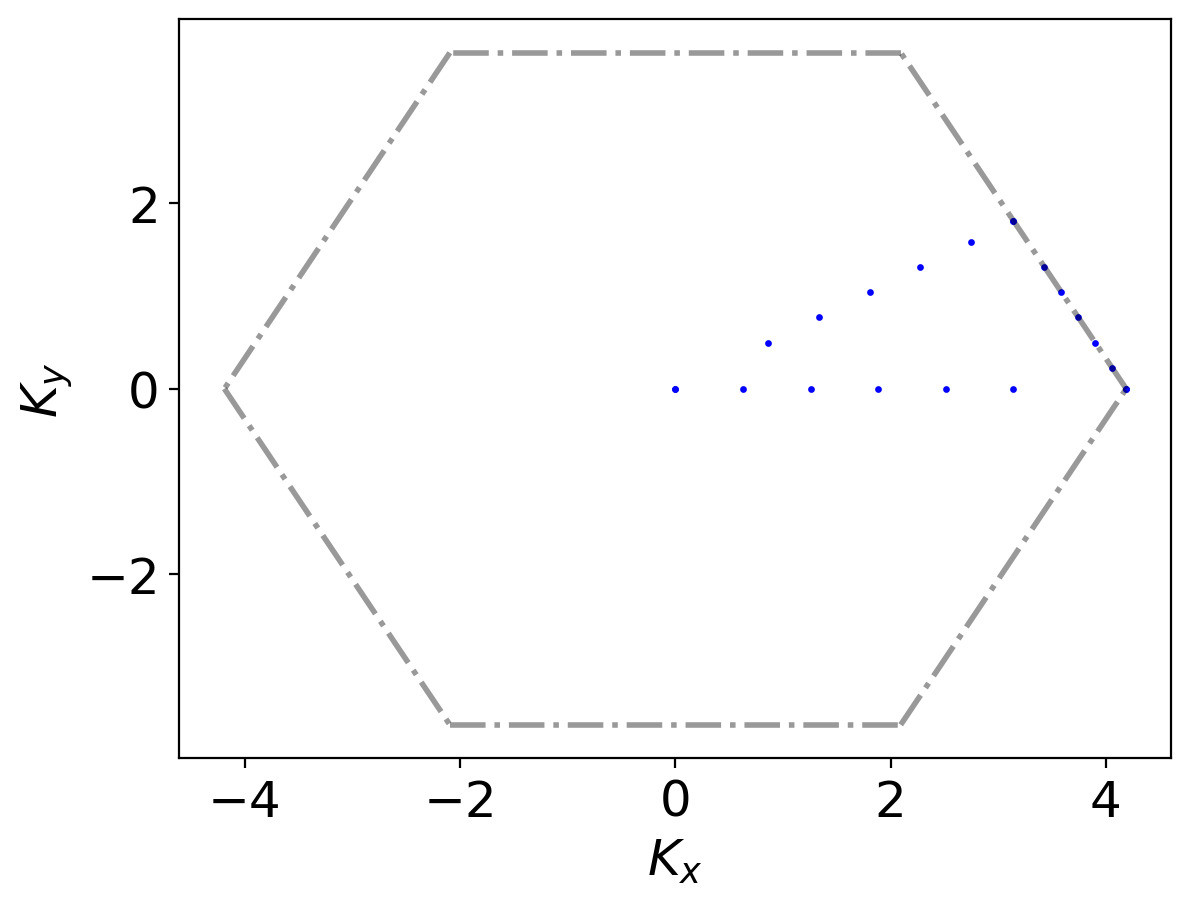

In [73]:
N = numKpoints
Gamma = np.array([0, 0])
#K = (4*np.pi/9)*np.array([1, 1/np.sqrt(3)])
#G = (2*np.pi/3)*np.array([1, 0])
K = (4*np.pi/3)*np.array([1, 0])
G = (4*np.pi/3)*(np.array([1, 0]) + np.array([np.cos(2*np.pi/6), np.sin(2*np.pi/6)]))/2

path = [Gamma]
path += [Gamma + (i/N)*(K-Gamma) for i in range(1, N+1)]
path += [K]
path += [K + (i/N)*(G-K) for i in range(1, N+1)]
path += [G]
path += [G + (i/N)*(Gamma-G) for i in range(1, N+1)]

total_K = np.array(path)
total_K = total_K[orders]
plt.scatter(total_K[:,0], total_K[:,1], label = 'Line', c = 'blue', s = 2)
theta_list = [2*np.pi*i/6 for i in range(7)]
lside = 4*np.pi/3
for j in range(6):
    plt.plot([lside*np.cos(theta_list[j]), lside*np.cos(theta_list[j+1])],
     [lside*np.sin(theta_list[j]), lside*np.sin(theta_list[j+1])], 'k-.', lw=2, alpha = 0.4)
plt.xlabel(r'$K_x$')
plt.ylabel(r'$K_y$')
plt.show()

# compare dimer

In [127]:
# change the folder!!
where_to_save = "../../data_prathus_runs/processedFT2/"
hoverJ_apq = ['0', '0.5', '1', '1.25', '2', '2.5', '3', '3.5', '4']
# slist = ['s=0.15', 's=0.65']
slist = ['s=0.15', 's=0.4', 's=0.65']

plot which s_p ? ['s=0.15' 's=0.4' 's=0.65']
plot which h/J ? ['0' '0.5' '1' '1.25' '2' '2.5' '3' '3.5' '4']


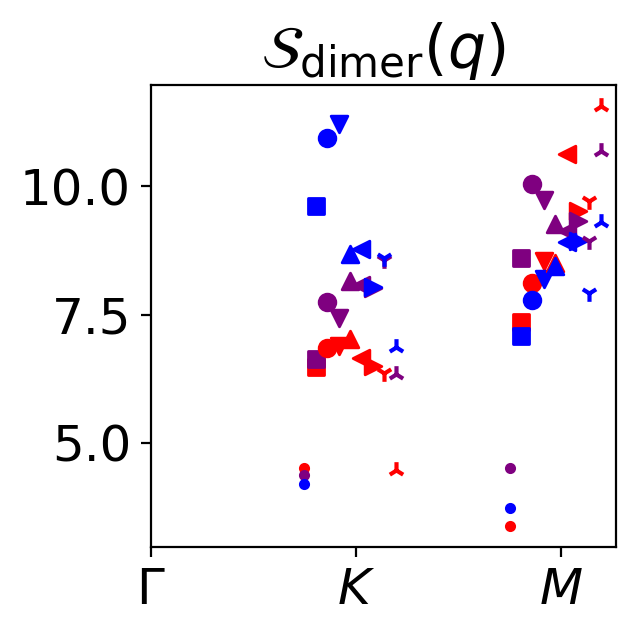

In [128]:
#some h, s=0.7

plt.rcParams['figure.dpi'] = 200
plt.rcParams.update({'font.size':18})
plt.figure(figsize=(3,3))

which_s = [0,1,2]
print('plot which s_p ?', np.array(slist)[which_s])
# which_hJ = [0, 1,2, 3]
which_hJ = range(len(hoverJ_apq))
print('plot which h/J ?', np.array(hoverJ_apq)[which_hJ])

step = 7
numKpoints = 40
# orders = [0, numKpoints, 2*numKpoints + 1, 3*numKpoints + 2]
orders = []
orders.extend([step*i for i in range(numKpoints//step)])
orders.extend([numKpoints])
orders.extend([numKpoints + step*i for i in range(numKpoints//step)])
orders.extend([2*numKpoints + 1])
orders.extend([2*numKpoints + 1 + step*i for i in range(numKpoints//step)])
orders.extend([3*numKpoints + 2])
# orders.extend([numKpoints + 4*i for i in range(10)])
# orders.extend([2*numKpoints + 1 + 4*i for i in range(10)])
# orders.extend([3*numKpoints + 2 + 4*i for i in range(10)])



tuples_s = list(zip([0.,1.0], ["red","blue"]))
cmap_s = mpl.colors.LinearSegmentedColormap.from_list("", tuples_s)


markers =  [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_"]
for i in which_hJ:
    for j in which_s:
        tag1 = hoverJ_apq[i]
        tag2 = slist[j]
        file_name = where_to_save + "3D_FT_h=" + tag1 + "_" + tag2 + ".hdf5"
        data2 = h5py.File(file_name, 'r')
        total_K = np.multiply(1, data2['total_K'])
        finalSQ_spin = np.real(data2['avg_sigmasigma'])

        Gamma = np.array([0,0])
        K = (4*np.pi/3)*np.array([1, 0])
        G = (4*np.pi/3)*(np.array([1, 0]) + np.array([np.cos(2*np.pi/6), np.sin(2*np.pi/6)]))/2
        dimer_k_values = []
        shift_i = (i - len(which_hJ)/2)/(2*len(which_hJ))
        for k in range(len(total_K)):
            kpt = total_K[k]
            if np.array_equal(kpt, Gamma + 0.1):
                # dimer_k_values.append(['Gamma',kpt, finalSQ_spin[i]])
                dimer_k_values.append([0 + shift_i, 3*168*finalSQ_spin[k]])
            if np.allclose(kpt, K, rtol = 5e-3):
                # dimer_k_values.append(['K',kpt, finalSQ_spin[i]])
                dimer_k_values.append([1 + shift_i, 3*168*finalSQ_spin[k]])
            if np.allclose(kpt, G, rtol = 5e-3):
                # dimer_k_values.append(['M', kpt, finalSQ_spin[i]])
                dimer_k_values.append([2 + shift_i, 3*168*finalSQ_spin[k]])

        dimer_k_values = np.array(dimer_k_values)
        # print(dimer_k_values)

        plt.scatter(dimer_k_values[:,0], dimer_k_values[:,1], marker = markers[i], color = cmap_s(j/(len(which_s) - 1)), label = 'h/J = ' + tag1 +' ' + tag2)

        
#numKpoints = len(finalSQ_spin_line)
xticks = np.array([0, 1, 2])
xticks_label = [r"$\Gamma$", r"$K$", r"$M$"]
# plt.ylim([0,0.03])
plt.xticks(ticks = xticks, labels = xticks_label);

# fakexy = (0, 0)
# a = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', color="Black", alpha=1.00)
# b = plt.Line2D(fakexy, fakexy, linestyle='none', marker='+', color="Black", alpha=1.00)
# plt.legend([a, b], [r"$s_p = 0.65$", r"$s_p = 0.15$"], loc='upper center', fontsize='small')

# plt.yscale('log')
# plt.title(r'$\mathcal{S}(q); h/J = $' + str(np.array(hoverJ_apq)[which_hJ]))
plt.title(r'$\mathcal{S}_{\rm dimer}(q)$')
# plt.title(r'$s_p = 0.65$')
# plt.title(r'$s_p = 0.15$')
# plt.legend(bbox_to_anchor = [1.5, 1], ncols = 1)
# plt.yscale('log')


# plt.savefig(where_to_save + "compare_APQ: " + tag2[2:] + ".png")
# plt.grid()
plt.show()

plot which s_p ? ['s=0.15' 's=0.4' 's=0.65']
plot which h/J ? ['0' '0.5' '1' '1.25' '2' '2.5' '3' '3.5' '4']


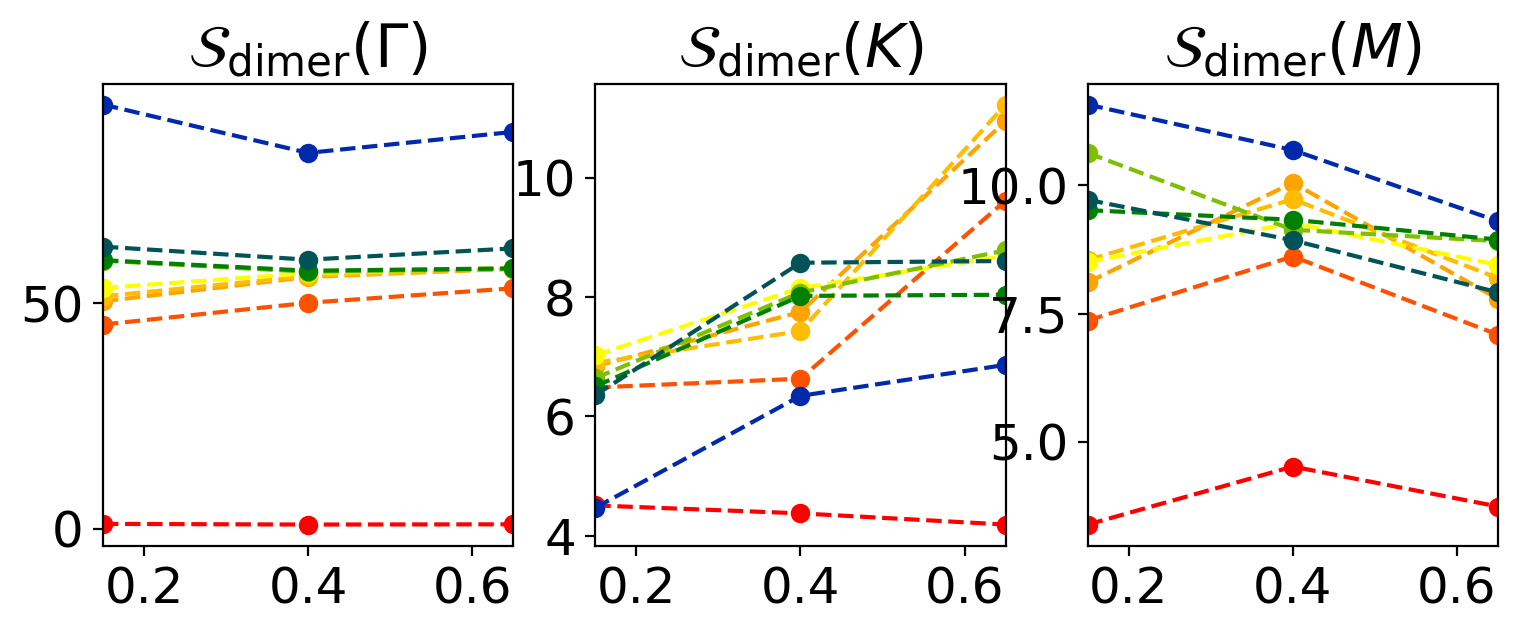

In [132]:
#some h, s=0.7

plt.rcParams['figure.dpi'] = 200
plt.rcParams.update({'font.size':18})
# plt.figure(figsize=(3,3))

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))

which_s = [0,1,2]
print('plot which s_p ?', np.array(slist)[which_s])
# which_hJ = [0, 1,2, 3]
which_hJ = range(len(hoverJ_apq))
print('plot which h/J ?', np.array(hoverJ_apq)[which_hJ])

cvals  = [0.,1.0,2.0,3.0,4.5]
colors = ["red","orange","yellow","green","blue"]
norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
cmap = mpl.colors.LinearSegmentedColormap.from_list("", tuples)

Gamma = np.array([0,0])
K = (4*np.pi/3)*np.array([1, 0])
G = (4*np.pi/3)*(np.array([1, 0]) + np.array([np.cos(2*np.pi/6), np.sin(2*np.pi/6)]))/2

kvalues = [Gamma, K, G]
titles = [r'$\mathcal{S}_{\rm dimer}(\Gamma)$', r'$\mathcal{S}_{\rm dimer}(K)$', r'$\mathcal{S}_{\rm dimer}(M)$']

markers =  ["o","+",'x']
for lm in range(len(kvalues)):
    kpoint_check = kvalues[lm]
    for i in which_hJ:
        xvals = []
        yvals = []
        for j in which_s:
            tag1 = hoverJ_apq[i]
            tag2 = slist[j]
            sp_val = float(tag2[2:])
            xvals.append(sp_val)
            file_name = where_to_save + "3D_FT_h=" + tag1 + "_" + tag2 + ".hdf5"
            data2 = h5py.File(file_name, 'r')
            total_K = np.multiply(1, data2['total_K'])
            finalSQ_spin = np.real(data2['avg_sigmasigma'])

            for k in range(len(total_K)):
                kpt = total_K[k]
                if np.allclose(kpt, kpoint_check, rtol = 5e-3):
                    value_here = 3*168*finalSQ_spin[k]
            yvals.append(value_here)

        ax[lm].plot(xvals, yvals, marker = markers[0], ls = '--', color = cmap(float(tag1)/4.5))
    
    # ax[lm].set_ylim([0,0.03])
    ax[lm].set_title(titles[lm])
    ax[lm].set_xlim([0.15, 0.65])
    ax[lm].set_xticks([0.2, 0.4, 0.6])
plt.show()